In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
#%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # bigger figure!


sns.set() # better looking figs


In [2]:
# our own set of small helper functions for plotting, etc
from utils import plot_embedding, plot_compare_embeddings, background_gradient, show_heatmap

In [3]:
df = pd.read_csv("questionnaire-answers-per-clip.csv")
constructs=df.T.iloc[7:].T.columns
df

,Unnamed: 0,clipName,pptID,condition,gettingOnWell,relationshipBetweenCharacters,workingTogether,leftDominant,rightDominant,leftCooperative,...,leftFearful,rightFearful,leftSad,rightSad,leftContent,rightContent,leftAngry,rightAngry,leftAmused,rightAmused
0,0,1Laugh1PushAway,55,4,0.0,0.0,0.0,4.0,4.0,4.0,...,3.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
1,1,1Laugh1PushAway,87,4,1.0,0.0,2.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0
2,2,1Laugh1PushAway,118,2,0.0,0.0,0.0,1.0,3.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,3.0
3,3,1Laugh1PushAway,136,2,2.0,0.0,2.0,1.0,3.0,1.0,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0
4,4,1Laugh1PushAway,417,4,2.0,2.0,2.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0
5,5,1Laugh1PushAway,681,4,1.0,1.0,2.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,4.0,2.0
6,6,1Laugh1PushAway,695,4,0.0,0.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,3.0
7,7,1Laugh1PushAway,1031,4,2.0,2.0,2.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,3.0,1.0
8,8,1Laugh1PushAway,1315,4,1.0,0.0,0.0,0.0,4.0,0.0,...,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,1.0
9,9,1Laugh1PushAway,1460,2,0.0,0.0,0.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0


## PCA for dimensionality reduction

In [4]:
from sklearn.decomposition import PCA

In [5]:
skel_df=df[df["condition"]==2] # skeleton only
skel=skel_df.T.iloc[7:].T.values
skel_means=skel_df.groupby(["clipName"]).mean().T.iloc[6:].T
skel_labels=skel_df["clipName"].values

fullscene_df=df[df["condition"]==4] # full scene
fullscene=fullscene_df.T.iloc[7:].T.values
fullscene_means=fullscene_df.groupby(["clipName"]).mean().T.iloc[6:].T
fullscene_labels=fullscene_df["clipName"].values

In [6]:
fullscene_df.groupby(["clipName"]).mean().T.iloc[6:].T


,leftDominant,rightDominant,leftCooperative,rightCooperative,leftCompetitive,rightCompetitive,leftFriendly,rightFriendly,leftAggressive,rightAggressive,...,leftFearful,rightFearful,leftSad,rightSad,leftContent,rightContent,leftAngry,rightAngry,leftAmused,rightAmused
clipName,,,,,,,,,,,,,,,,,,,,,
1Laugh1PushAway,1.615385,3.076923,2.076923,1.846154,1.692308,3.000000,2.846154,1.846154,1.692308,2.769231,...,1.153846,1.538462,0.846154,1.153846,2.461538,1.923077,0.692308,1.923077,3.076923,1.769231
1Laughing,2.411765,1.705882,2.529412,3.000000,2.176471,1.823529,2.705882,3.176471,1.588235,1.235294,...,1.000000,0.882353,0.941176,0.529412,2.529412,2.823529,0.705882,0.529412,2.352941,3.058824
1PushBothExcited,1.416667,3.000000,3.083333,1.750000,1.583333,3.166667,3.166667,2.250000,1.166667,3.083333,...,1.166667,1.083333,1.000000,1.333333,2.250000,2.250000,0.916667,1.333333,2.416667,2.500000
1PushesHand,1.315789,3.000000,2.842105,1.947368,1.894737,3.421053,2.736842,1.947368,1.421053,2.578947,...,1.842105,1.052632,1.368421,0.736842,2.157895,2.263158,1.368421,1.631579,1.789474,2.263158
1StopsOtherPlay,1.357143,3.071429,1.785714,1.928571,1.428571,3.285714,2.428571,1.571429,1.714286,3.000000,...,1.857143,1.142857,1.642857,1.500000,1.928571,1.785714,1.357143,2.285714,1.642857,1.571429
1Task1Watch,1.692308,1.769231,2.846154,2.615385,1.846154,1.692308,3.153846,3.153846,1.384615,1.076923,...,0.692308,0.923077,0.615385,0.692308,3.153846,2.923077,0.769231,0.461538,2.461538,2.461538
bothDistressedTable,1.000000,3.142857,2.571429,2.714286,2.428571,2.714286,3.000000,2.428571,1.571429,1.428571,...,1.000000,0.428571,0.714286,0.571429,2.571429,3.142857,1.000000,1.142857,2.571429,2.285714
discussAndTogether,1.307692,2.615385,3.230769,2.846154,1.923077,2.692308,3.153846,2.923077,1.076923,1.615385,...,1.307692,1.076923,0.846154,1.000000,2.923077,2.769231,0.692308,0.923077,2.461538,2.153846
excitedChild,3.062500,1.125000,1.250000,2.250000,2.875000,1.562500,1.375000,2.562500,3.375000,1.250000,...,1.062500,1.500000,1.250000,1.687500,2.187500,2.375000,1.750000,1.187500,2.875000,2.000000


In [7]:
skel_df.groupby(["clipName"]).mean().T.iloc[6:].T

,leftDominant,rightDominant,leftCooperative,rightCooperative,leftCompetitive,rightCompetitive,leftFriendly,rightFriendly,leftAggressive,rightAggressive,...,leftFearful,rightFearful,leftSad,rightSad,leftContent,rightContent,leftAngry,rightAngry,leftAmused,rightAmused
clipName,,,,,,,,,,,,,,,,,,,,,
1Laugh1PushAway,1.625000,2.250000,2.437500,2.500000,1.500000,2.312500,2.500000,2.000000,1.187500,2.062500,...,1.312500,0.875000,1.437500,0.562500,2.375000,2.000000,1.187500,1.312500,2.187500,1.687500
1Laughing,1.952381,1.619048,2.333333,2.571429,1.952381,1.666667,2.761905,2.904762,1.952381,1.714286,...,1.000000,1.666667,0.714286,1.142857,2.238095,2.380952,1.571429,1.190476,2.571429,2.476190
1PushBothExcited,1.733333,2.666667,2.266667,2.066667,2.133333,2.800000,2.333333,2.066667,1.800000,2.666667,...,1.533333,1.000000,1.266667,0.666667,2.133333,2.266667,1.466667,2.133333,1.200000,1.333333
1PushesHand,1.700000,1.400000,3.000000,2.500000,1.400000,1.800000,2.600000,2.600000,1.200000,1.300000,...,0.700000,0.700000,0.700000,0.700000,2.400000,2.500000,0.700000,0.700000,1.800000,1.600000
1StopsOtherPlay,2.666667,1.400000,2.200000,2.600000,2.200000,1.533333,2.066667,2.466667,2.000000,1.466667,...,1.133333,1.866667,1.000000,1.533333,2.133333,2.200000,1.933333,1.600000,1.666667,1.733333
1Task1Watch,2.500000,1.250000,2.312500,1.937500,1.937500,1.562500,2.562500,2.250000,1.687500,1.500000,...,0.875000,1.687500,0.875000,1.812500,2.750000,1.875000,0.937500,1.625000,2.500000,1.687500
bothDistressedTable,1.173913,2.521739,2.652174,1.956522,1.608696,2.217391,2.608696,2.130435,1.173913,2.043478,...,1.956522,0.956522,1.913043,0.956522,1.956522,2.521739,1.173913,1.869565,1.782609,2.086957
discussAndTogether,1.882353,1.470588,2.529412,2.588235,1.705882,1.470588,2.470588,2.411765,1.470588,1.352941,...,1.294118,1.470588,1.235294,1.294118,2.588235,2.529412,1.411765,1.411765,2.058824,2.176471
excitedChild,2.533333,1.866667,1.800000,2.400000,2.800000,1.866667,2.600000,2.600000,2.933333,1.600000,...,1.200000,1.733333,1.133333,1.400000,2.266667,2.400000,1.733333,1.466667,2.466667,2.333333


In [8]:
fullscene_pca_model=PCA(n_components=6)
fullscene_pca_model.fit(fullscene)

fullscene_pca = fullscene_pca_model.transform(fullscene)
fullscene_means_pca = fullscene_pca_model.transform(fullscene_means.values)

# either we create an independent PCA model for the skeletal data, or
# we reuse the fullscene one
skel_pca_model=PCA(n_components=6).fit(skel)
#skel_pca_model = fullscene_pca_model

skel_pca = skel_pca_model.transform(skel)
skel_means_pca = skel_pca_model.transform(skel_means.values)




## Plotting of the embeding

`plot_embedding` plots each questionnaire's response when projected along the first 2 eigenvectors. Responses' colours correspond to the clips.

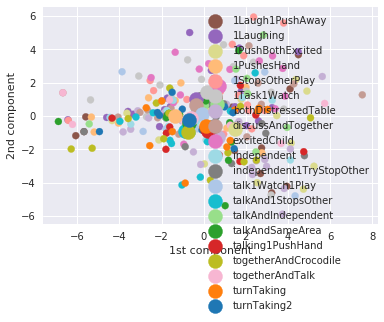

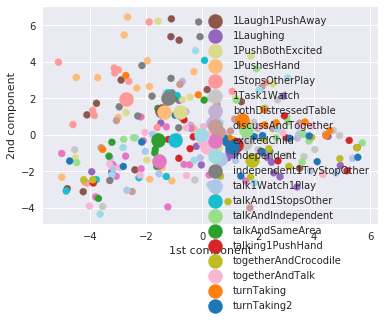

In [9]:
plot_embedding(skel_pca, skel_labels, skel_means_pca, skel_means.index, three_d=False) 
plot_embedding(fullscene_pca, fullscene_labels, fullscene_means_pca, fullscene_means.index, three_d=False)

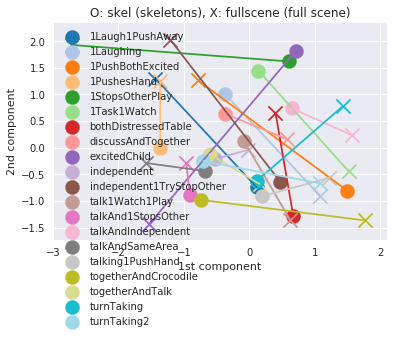

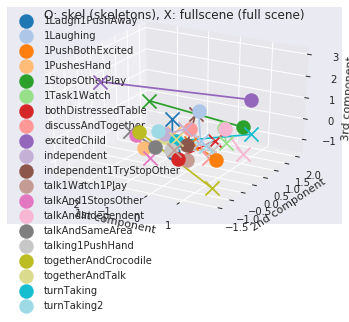

In [10]:
plot_compare_embeddings(skel_means_pca, fullscene_means_pca, skel_means.index,three_d=False)
plot_compare_embeddings(skel_means_pca, fullscene_means_pca, skel_means.index,three_d=True)

In [11]:
distances_pca=pd.DataFrame(np.power(np.sum(np.power(skel_means_pca - fullscene_means_pca, 2), axis=1), 0.5), index=skel_means.index, columns=["distance_pca"])
distances_pca

,distance_pca
clipName,
1Laugh1PushAway,2.901689
1Laughing,2.481838
1PushBothExcited,3.534268
1PushesHand,1.279388
1StopsOtherPlay,3.402040
1Task1Watch,3.123363
bothDistressedTable,2.559608
discussAndTogether,1.658663
excitedChild,4.610487


In [12]:
skel_pca_model.explained_variance_ratio_.cumsum()

array([0.28293556, 0.42427946, 0.52529598, 0.58780735, 0.64333941,
       0.68723431])

In [13]:
fullscene_pca_model.explained_variance_ratio_.cumsum()

array([0.25259011, 0.41081217, 0.52573506, 0.59399419, 0.64685227,
       0.69016467])

In [14]:
# plot of PCA components, with fullscene vs skeleton components side-by-side

skel_pca_components = pd.DataFrame(skel_pca_model.components_,columns=constructs).T
fullscene_pca_components = pd.DataFrame(fullscene_pca_model.components_,columns=constructs).T

# merge PCA components into one dataframe, skel and fullscene side-by-side
pca_components=pd.concat([skel_pca_components, fullscene_pca_components], keys=["skel", "fullscene"], axis=1)
pca_components=pca_components.swaplevel(0,1,1).sort_index(1)


show_heatmap(pca_components)


## LDA

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
nb_components = 4

fullscene_lda_model = LinearDiscriminantAnalysis(n_components=nb_components, solver='svd')
# we perform the LDA *on top of the PCA* as LDA typically requires O > 3 F, with O the nb of observations and F the nb of features (here, we have ~26 observations for originally 25 questions)
fullscene_lda_model.fit(fullscene_pca, fullscene_labels)

fullscene_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(fullscene))
fullscene_means_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(fullscene_means.values))

skel_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(skel))
skel_means_lda = fullscene_lda_model.transform(fullscene_pca_model.transform(skel_means.values))


# compute as well a LDA model from the skeletal PCA to compare components with fullscene
skel_lda_model = LinearDiscriminantAnalysis(n_components=nb_components, solver='svd')
skel_lda_model.fit(skel_pca, skel_labels)



LinearDiscriminantAnalysis(n_components=4, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

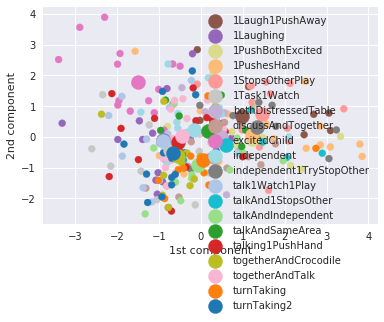

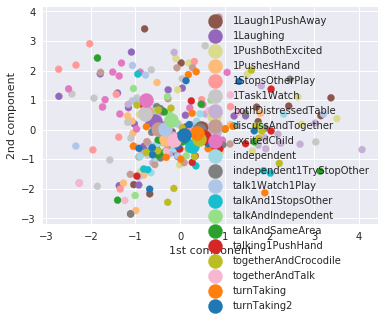

In [17]:
plot_embedding(fullscene_lda, fullscene_labels,fullscene_means_lda, fullscene_means.index, three_d=False)
plot_embedding(skel_lda, skel_labels,skel_means_lda, skel_means.index, three_d=False)

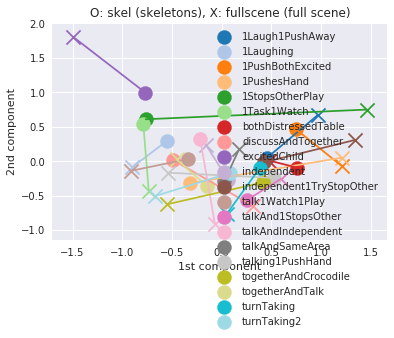

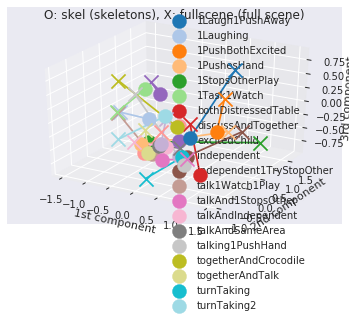

In [18]:
plot_compare_embeddings(skel_means_lda, fullscene_means_lda, fullscene_means.index,three_d=False)
plot_compare_embeddings(skel_means_lda, fullscene_means_lda, skel_means.index,three_d=True)

In [19]:
fullscene_lda_model.explained_variance_ratio_

array([0.50330235, 0.25455381, 0.11012635, 0.06643588])

In [20]:
fullscene_lda_model.scalings_.shape


(6, 6)

In [21]:
distances_lda=pd.DataFrame(np.power(np.sum(np.power(skel_means_lda - fullscene_means_lda, 2), axis=1), 0.5), index=skel_means.index, columns=["distance_lda"])

distances = pd.concat([distances_pca, distances_lda], axis=1)
s = distances.style.background_gradient(cmap="summer")
s

,distance_pca,distance_lda
clipName,,
1Laugh1PushAway,2.90169,1.39128
1Laughing,2.48184,0.699011
1PushBothExcited,3.53427,1.12945
1PushesHand,1.27939,1.7543
1StopsOtherPlay,3.40204,2.28616
1Task1Watch,3.12336,1.56624
bothDistressedTable,2.55961,1.51713
discussAndTogether,1.65866,1.45519
excitedChild,4.61049,1.09196


In [22]:
# plot of LDA components, with fullscene vs skeleton components side-by-side

fullscene_lda_components = pd.DataFrame(fullscene_lda_model.scalings_.T).T
skel_lda_components = pd.DataFrame(skel_lda_model.scalings_.T).T

# merge PCA components into one dataframe, skel and fullscene side-by-side
lda_components=pd.concat([fullscene_lda_components, skel_lda_components], keys=["fullscene", "skel"], axis=1)
lda_components=lda_components.swaplevel(0,1,1).sort_index(1)

show_heatmap(lda_components)

## Explorative Factor Analysis

In [23]:
import factor_analyzer


In [24]:
skel_ratings_df=skel_df.T.iloc[7:].T.astype(float)
fullscene_ratings_df=fullscene_df.T.iloc[7:].T.astype(float)

In [36]:
fa_skel = factor_analyzer.FactorAnalyzer()
fa_skel.analyze(skel_ratings_df,6,rotation='oblimin')
skel_loadings=fa_skel.loadings

fa_fullscene = factor_analyzer.FactorAnalyzer()
fa_fullscene.analyze(fullscene_ratings_df,6,rotation='oblimin')
fullscene_loadings=fa_fullscene.loadings

In [37]:
# merge loadings into one dataframe, skel and fullscene side-by-side
loadings=pd.concat([skel_loadings, fullscene_loadings], keys=["skel", "fullscene"], axis=1)
loadings=loadings.swaplevel(0,1,1).sort_index(1)
show_heatmap(loadings[abs(loadings)>=0.35])

/usr/lib/python3/dist-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [27]:
fa_skel.get_factor_variance()


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,1.664390,2.405380,1.566245,2.681079,1.865456,2.036183
Proportion Var,0.075654,0.109335,0.071193,0.121867,0.084793,0.092554
Cumulative Var,0.075654,0.184990,0.256183,0.378050,0.462843,0.555397


In [28]:
fa_fullscene.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,3.914343,2.339502,2.002194,2.071277,1.055608,1.820886
Proportion Var,0.177925,0.106341,0.091009,0.094149,0.047982,0.082768
Cumulative Var,0.177925,0.284266,0.375274,0.469423,0.517406,0.600173


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c2e7cb978>,
      dtype=object)

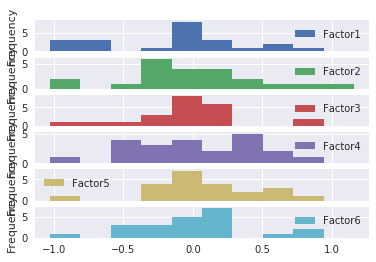

In [29]:
# check for normality of the difference of loadings -> look normal. paired t-test valid
diff=skel_loadings - fullscene_loadings
diff.plot(kind="hist",subplots=True)



In [30]:
for k in diff.columns: print("%s: %s" % (k,stats.ttest_rel(skel_loadings[k], fullscene_loadings[k])))

Factor1: Ttest_relResult(statistic=-1.2175445874720674, pvalue=0.23690204549659183)
Factor2: Ttest_relResult(statistic=0.12424706055943695, pvalue=0.9023012788430881)
Factor3: Ttest_relResult(statistic=-0.3928483202578791, pvalue=0.6983908940014264)
Factor4: Ttest_relResult(statistic=0.3460117926154815, pvalue=0.7327763578584848)
Factor5: Ttest_relResult(statistic=1.0078194468763013, pvalue=0.32501331088654817)
Factor6: Ttest_relResult(statistic=0.15971297506040102, pvalue=0.8746333813503664)


In [31]:
for k in diff.columns: print("%s: %s" % (k,stats.wilcoxon(diff[k])))

Factor1: WilcoxonResult(statistic=99.0, pvalue=0.3719614039338499)
Factor2: WilcoxonResult(statistic=122.0, pvalue=0.8838460571465129)
Factor3: WilcoxonResult(statistic=120.0, pvalue=0.8328664161727948)
Factor4: WilcoxonResult(statistic=117.0, pvalue=0.7577599676939444)
Factor5: WilcoxonResult(statistic=97.0, pvalue=0.3381955547039681)
Factor6: WilcoxonResult(statistic=118.0, pvalue=0.7825803044501396)


## Clustering

In [32]:
from sklearn.cluster import KMeans

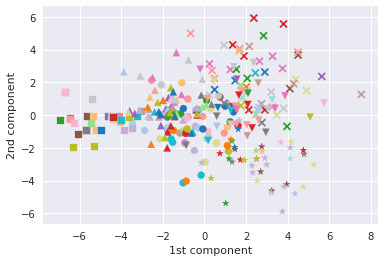

In [33]:
# kMeans clustering after PCA-based dimensionality reduction
# the number of clusters is essentially arbitrary
skel_clustering_data=skel_pca
skel_kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(skel_clustering_data)
plot_embedding(skel_clustering_data,skel_labels, clusters=skel_kmeans, three_d=False)

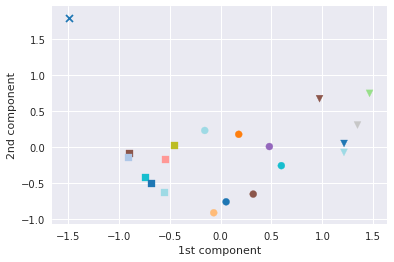

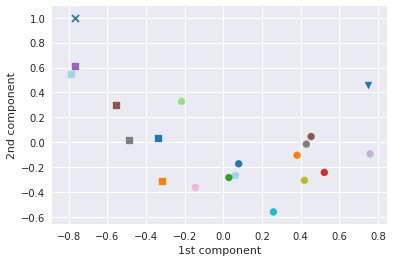

In [34]:
# kMeans clustering after LDA-based dimensionality reduction
fullscene_clustering_data=fullscene_means_lda
skel_clustering_data=skel_means_lda

nb_clusters=4

fullscene_kmeans_model = KMeans(n_clusters=nb_clusters, random_state=0).fit(fullscene_clustering_data)
fullscene_kmeans = fullscene_kmeans_model.predict(fullscene_clustering_data)

# either an independent kMeans instance, or reuse the trained 'fullscene' one
#skel_kmeans = KMeans(n_clusters=nb_clusters, random_state=0).fit_predict(skel_clustering_data)
skel_kmeans= fullscene_kmeans_model.predict(skel_clustering_data)

plot_embedding(fullscene_clustering_data,fullscene_means.index, clusters=fullscene_kmeans, three_d=False)
plot_embedding(skel_clustering_data,skel_means.index, clusters=skel_kmeans, three_d=False)

In [35]:
skel_clipPerClusters_df=pd.DataFrame()
fullscene_clipPerClusters_df=pd.DataFrame()

for i in skel_kmeans:
    skel_clipPerClusters_df[i] = skel_df[skel_kmeans == i]["clipName"].value_counts()
    
for i in fullscene_kmeans:
    fullscene_clipPerClusters_df[i] = fullscene_df[fullscene_kmeans == i]["clipName"].value_counts()

clipPerClusters_df=pd.concat([skel_clipPerClusters_df.T, fullscene_clipPerClusters_df.T], sort=False, keys=["skel", "fullscene"]).T
#clipPerClusters_df.T.plot(kind='bar')

ValueError: Item wrong length 20 instead of 276.

In [ ]:
fullscene_clipPerClusters_df.T.plot(kind='bar', cmap=plt.get_cmap("tab20"), title="Clips found in each cluster (fullscene data); clustering after LDA dimensionality reduction")
skel_clipPerClusters_df.T.plot(kind='bar', cmap=plt.get_cmap("tab20"), title="Clips found in each cluster (skeletal data); clustering after LDA dimensionality reduction")

In [ ]:
# using MeanShift to estimate the number of cluster is not very effective on such a distribution
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(skel_clustering_data, quantile=0.2)
skel_ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(skel_clustering_data)
plot_embedding(skel_clustering_data,skel_labels, clusters=skel_ms, three_d=True)



# Classification

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf')

# trying with skel, skel_pca, skel_lda do not lead to any clear improvements
training_set = fullscene_means_lda
#training_labels = skel_labels
training_labels = fullscene_kmeans

testing_set = skel_means_lda
#testing_labels = fullscene_labels
#testing_labels = fullscene_kmeans_model.predict(skel_lda)
testing_labels = fullscene_kmeans

clf.fit(training_set, training_labels)

In [38]:
for p, l in zip(clf.predict(testing_set), testing_labels):
    print("%s (should be %s)" % (p,l))
print("SVM: %.1f%% successful prediction out of %d tested clips" % (clf.score(testing_set, testing_labels) * 100, len(testing_labels)))

NameError: name 'clf' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(testing_labels, clf.predict(testing_set))
plot_confusion_matrix(cnf_matrix, classes=pd.unique(testing_labels))